# Data Exploration of the CheXpert training set

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style='white')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (6,4)
sns.set_context('paper', font_scale=1.2)

## Opening the CSV file

### If using Colab and Google Drive

Mount Google Drive. It will ask for an authorization code (log into your account) each time you restart the runtime.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### For Colab or Local Files

Next, update this filepath to where the csv file is located on your Google Drive / on your computer, then load the csv as a pandas dataframe

In [2]:
filepath = "/Volumes/GBackup/Data/CheXpertDataset/train.csv"

In [3]:
df = pd.read_csv(filepath)
df.head(4)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


## Explore demographics

In [4]:
#Print out all the columns of the dataset
df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

Most of the columns are for the pathologies, with a few about age, sex, and the image type (frontal/lateral, ap/pa)

In [5]:
df.groupby('Sex').count()

,Path,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
Sex,,,,,,,,,,,,,,,,,,
Female,90777,90777,90777,78875,9269,17957,18470,48189,4922,36362,29495,11375,27600,31434,54543,2431,4387,48633
Male,132636,132636,132636,112151,13111,26881,27733,69589,7022,49594,41126,16233,40843,47500,78667,4061,7807,74584
Unknown,1,1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0


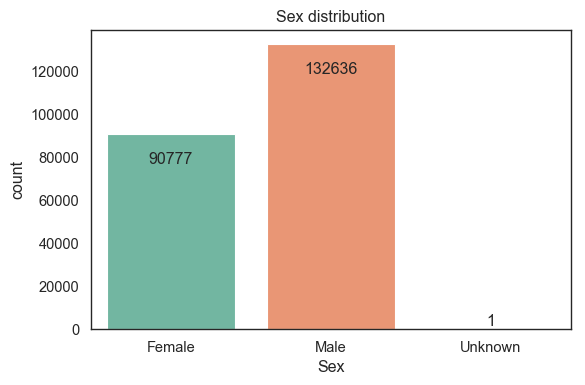

In [31]:
#plot the sex distribution in the dataset
ax = sns.countplot(df['Sex'], palette='Set2')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0] #gives the x position for the label placement
    y=p.get_bbox().get_points()[1,1] #gives the count value and the y position for the labels
    if(y > 20000):
          plot_y = y - 15000
    else:
          plot_y = y
    ax.annotate(f'{int(y)}', (x.mean(), plot_y), ha='center', va='bottom')
plt.title('Sex distribution')
plt.tight_layout()
plt.show()

There are more male images than female images, which could have implications for the model (for example, if breasts are associated with a certain pathology rather than the visual of the lungs for that pathology). One image has sex listed as unknown, so we will probably remove that one image.

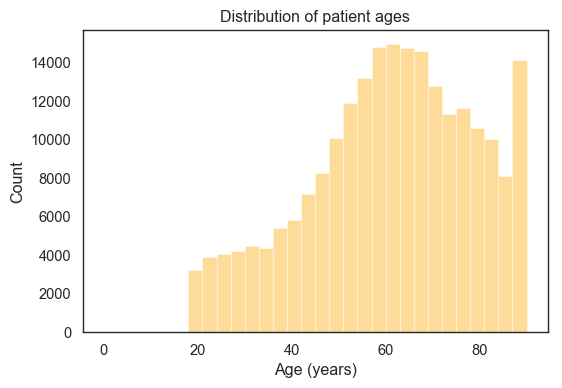

In [32]:
sns.distplot(df['Age'], kde=False, bins=30, color='orange')
plt.title('Distribution of patient ages')
plt.ylabel('Count')
plt.xlabel('Age (years)')
plt.show()

In [8]:
df[df['Age']<18]['Age']

223411    0
223412    0
223413    0
Name: Age, dtype: int64


Most of the images are for patients older than 18 years (possibly due to study consent). Three images are marked as age '0', so those will be removed for our model.

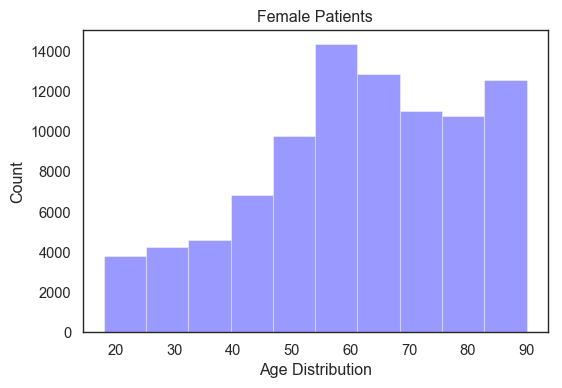

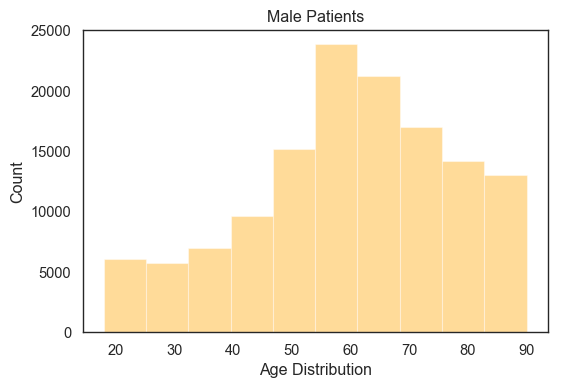

In [33]:
sns.distplot(df[(df['Sex']=='Female') & (df['Age']>17)]['Age'], 
         color='blue', kde=False, bins=10)
plt.title('Female Patients')
plt.xlabel('Age Distribution')
plt.ylabel('Count')
plt.show()

sns.distplot(df[(df['Sex']=='Male')]['Age'], 
         color='orange', kde=False, bins=10)
plt.title('Male Patients')
plt.xlabel('Age Distribution')
plt.ylabel('Count')
plt.show()


Male and Female age distributions look similar. Both are centered around 55, and have more older than younger patients.

In [10]:
df[(df['Sex']=='Female') & (df['Age']>17)]['Age'].describe()

count    90774.000000
mean        61.231090
std         18.297303
min         18.000000
25%         49.000000
50%         62.000000
75%         76.000000
max         90.000000
Name: Age, dtype: float64

In [11]:
df[(df['Sex']=='Male')]['Age'].describe()

count    132636.000000
mean         59.884413
std          17.464168
min          18.000000
25%          49.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: Age, dtype: float64

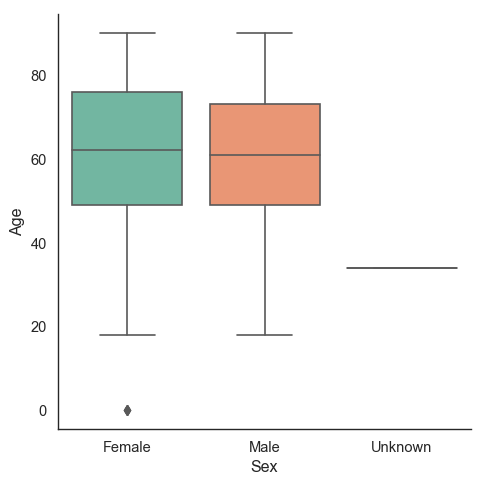

In [34]:
sns.catplot(
    x='Sex', 
    y='Age', 
#     hue='Sex',
    kind='box', 
    data=df, 
    palette=sns.color_palette('Set2'))
plt.show()

Again, male and female age distributions look about the same.

## Exploring the different pathologies

There are 14 outcomes (13 pathologies plus 'no finding')

In [13]:
outcomes = ['No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

len(outcomes)

14

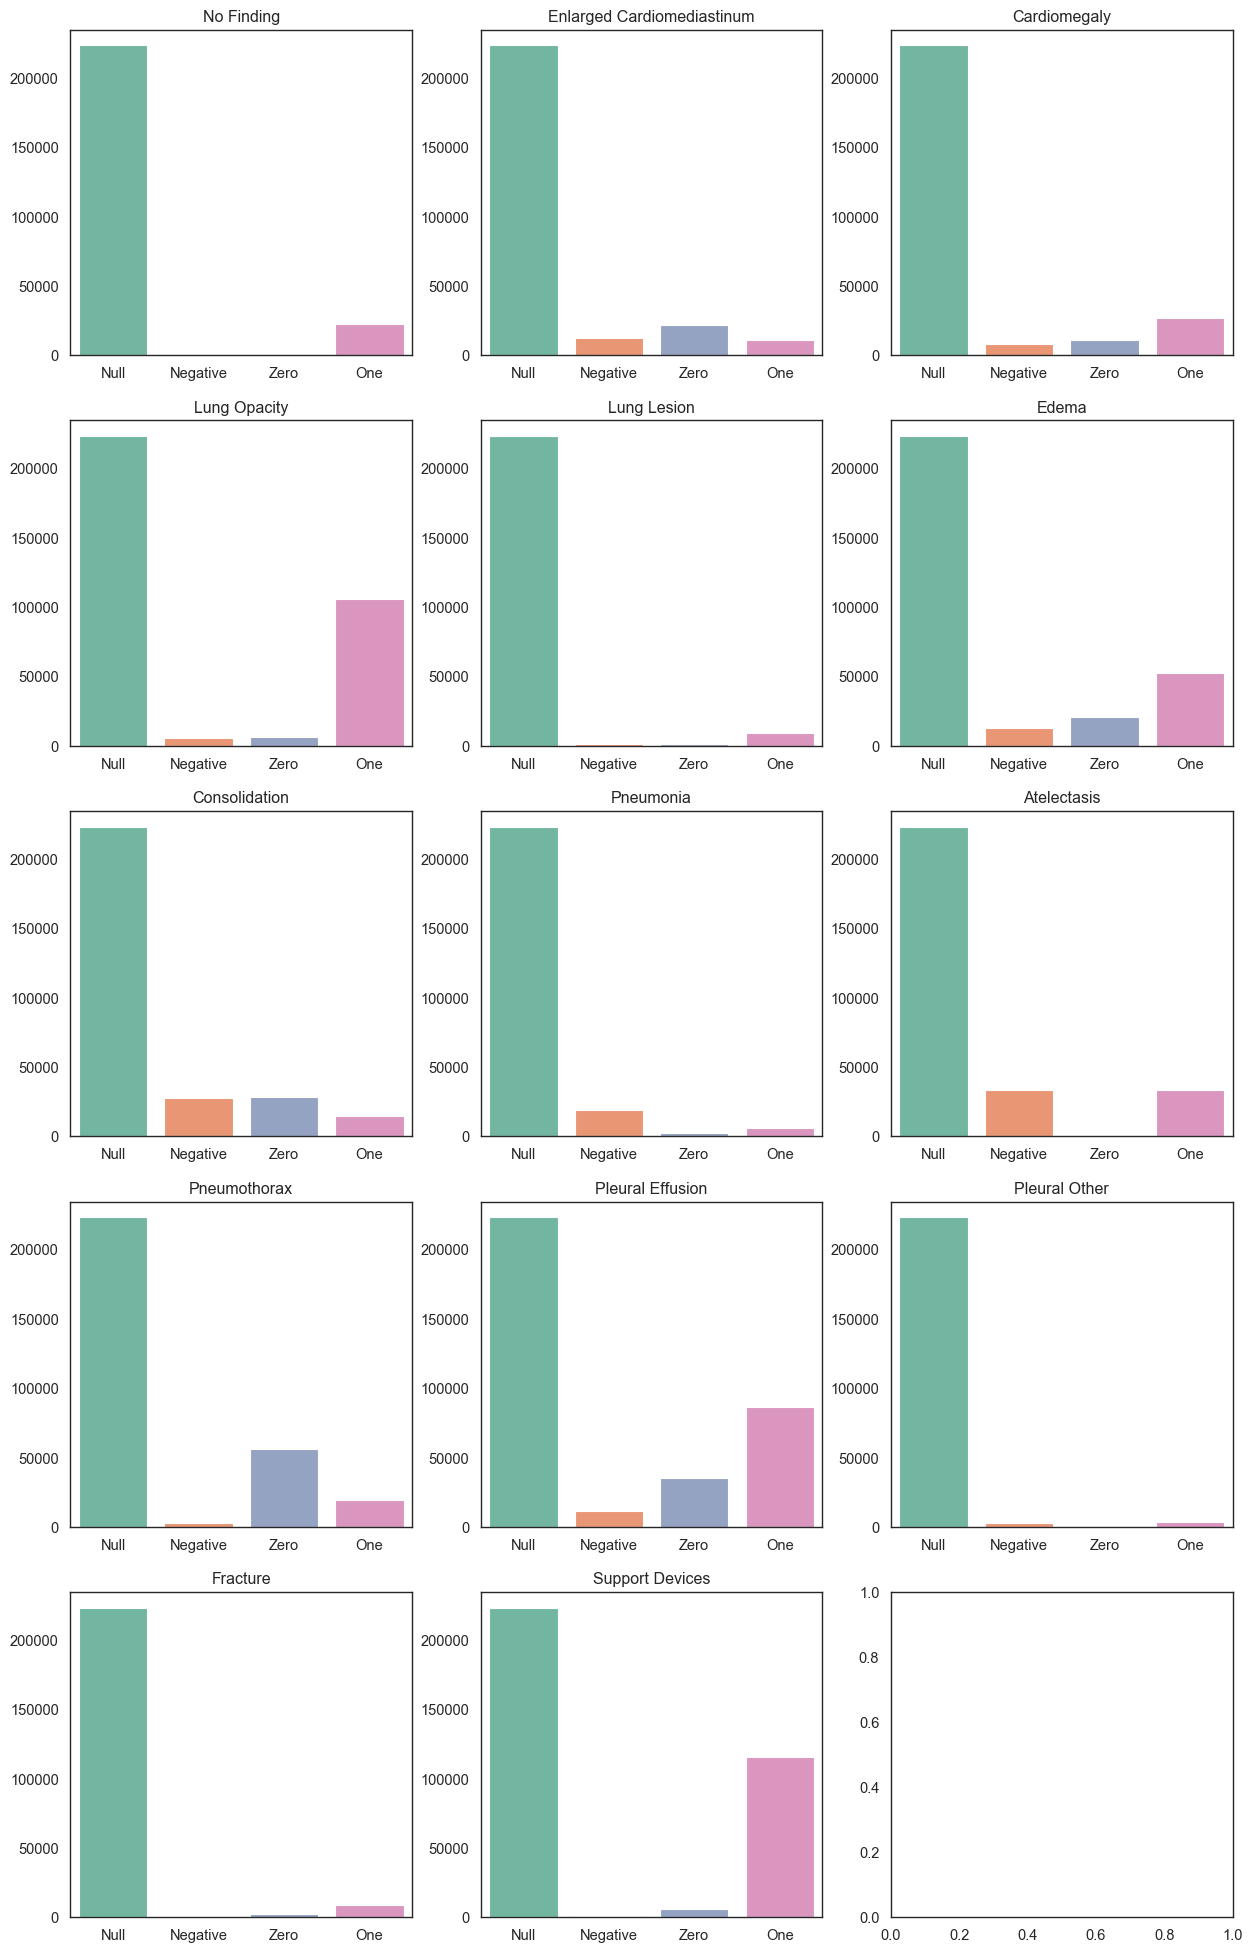

In [35]:
numrows = 5
numcols = 3

f, ax = plt.subplots(nrows=numrows, ncols=numcols, figsize=(numcols*5,numrows*5))


for subplot, pathology in enumerate(outcomes):
  nulls = df[pathology].isna().count()
  negs = df[df[pathology] == -1]['Age'].count()
  zeros = df[df[pathology] == 0]['Age'].count()
  ones = df[df[pathology]==1]['Age'].count()

  plt.subplot(numrows, numcols, subplot+1)
  
  sns.barplot(
      x = ['Null', 'Negative', 'Zero', 'One'],
      y = [nulls, negs, zeros, ones],
      palette=sns.color_palette('Set2')
  )
  plt.title(pathology)

plt.show()


A 1 means the radiologist positively identified it; a 0 means the radiologist confirmed 'no' to that pathology; A -1 means the NLP reading of the radiologist report was a 'maybe' for the pathology; and a 'null' means the radiologist did not mention the pathology. This dataset is mostly filled with nulls.

## Multiple Pathologies

Looking at the first few results (and thinking medically), it appears that a patient can have more than one pathology at a time.

### Add a 'number of pathologies' column

In [15]:
#We have the list of outcome categories.
#We want only the ones
#And to sum up the ones for each patient...

outcomes_only = ['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices']

df['Num Pathologies'] = df[ df[ outcomes_only ] > 0  ].sum(axis=1)


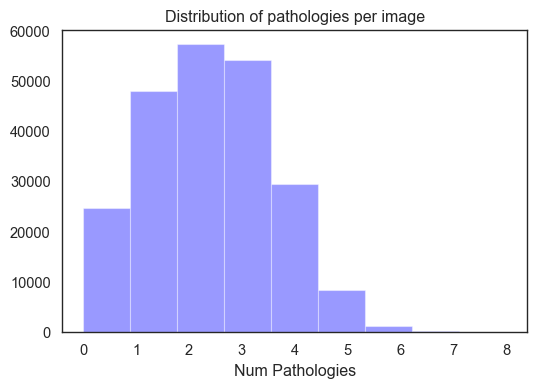

In [36]:
sns.distplot(df['Num Pathologies'], bins=9, kde=False, color='blue')
plt.title('Distribution of pathologies per image')
plt.show()

Many individuals have multiple pathologies at once. This is important to consider when doing a multiclassifying model.

## Explore correlation between pathologies

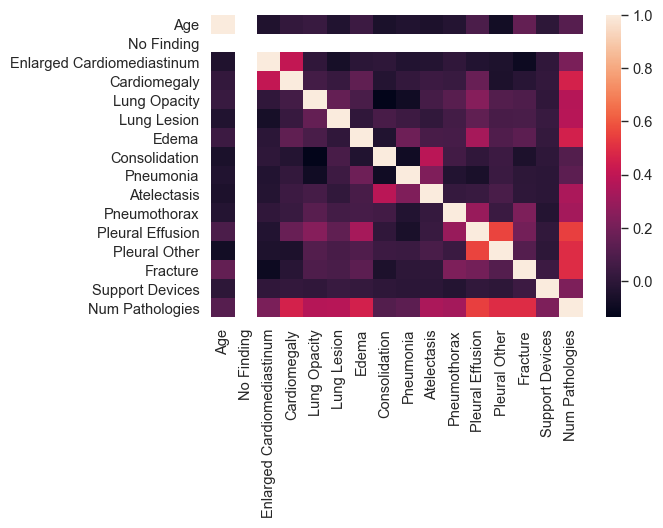

In [37]:
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

The number of pathologies appears to correlate better with some outcomes than others - pleural effusion, for example, has a higher number of pathologies - aka if you have pleural effusion, you’re more likely to have other things. 
Pleural effusion correlates highly with pleural other.

## Remove negative ones and redo correlation

replacing negatives with 1s - aka making 'maybes' into 'yes'

In [18]:
df_binary = df.copy()
    
df_binary[outcomes] = df_binary[outcomes].replace(-1,1)
    
df_binary.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,2.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0


How does that affect the correlations?

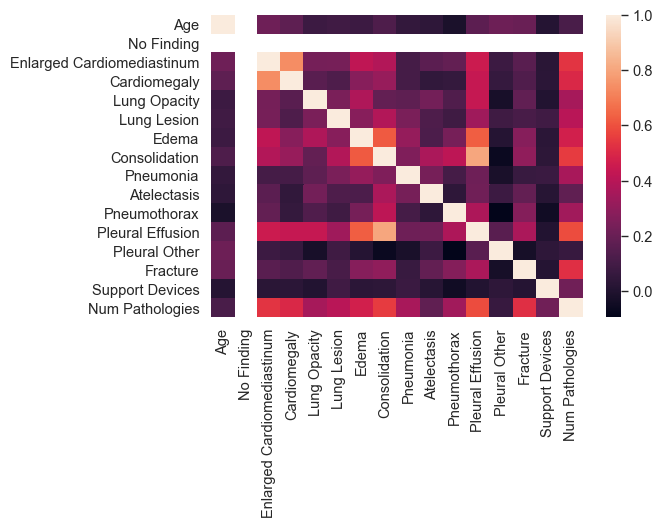

In [38]:
corr = df_binary.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

What if we changed uncertain to various fractions between 0 and 1? 

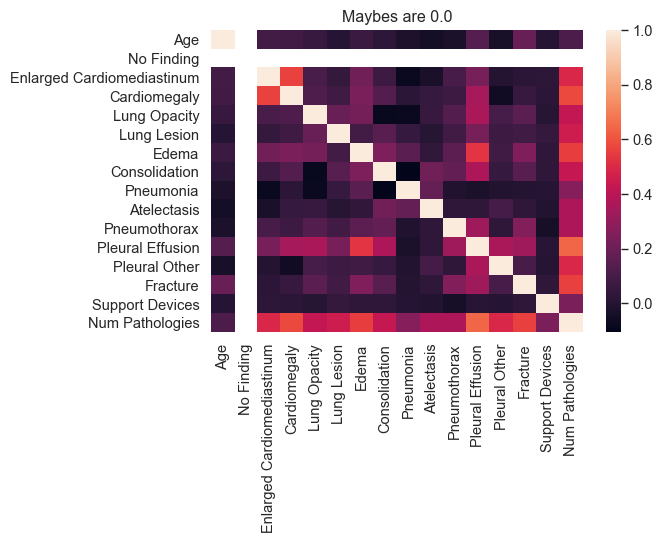

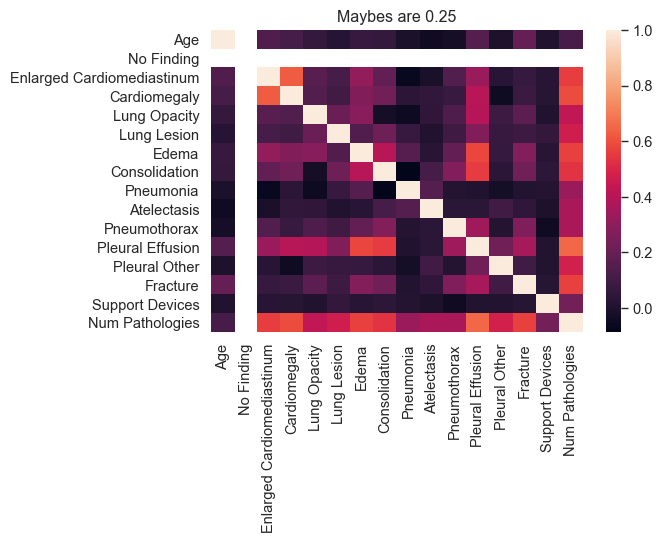

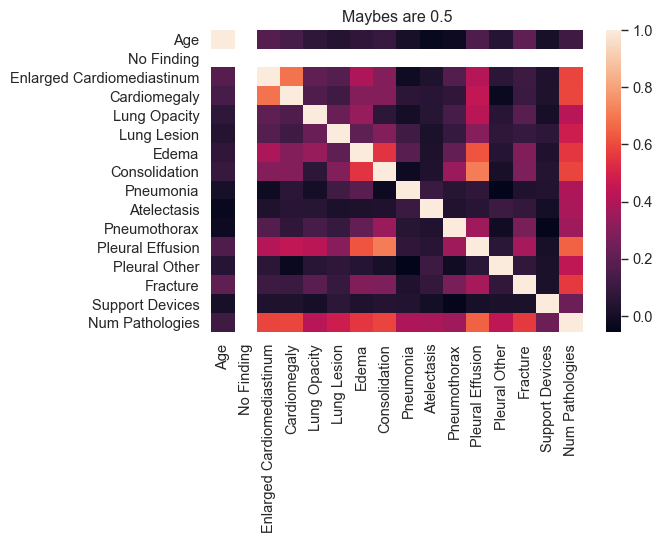

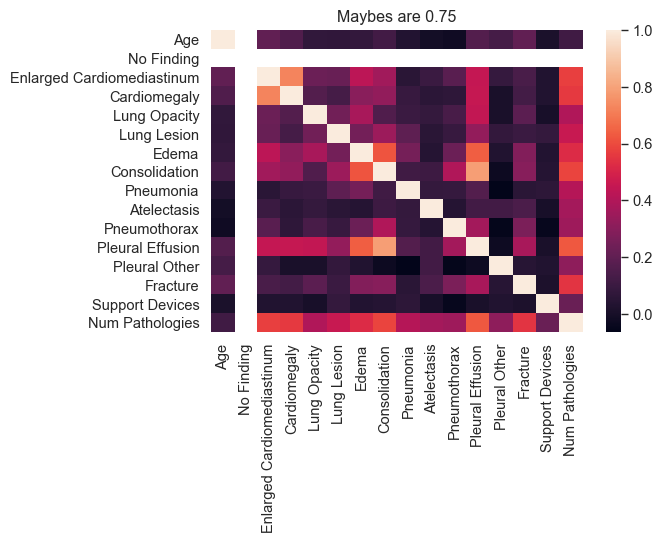

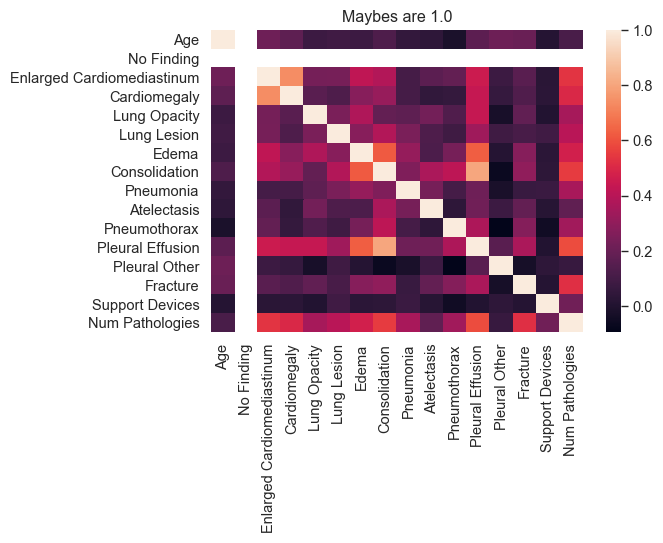

In [39]:
df_medium = df.copy()

for i in range(0,5):
  df_medium = df.copy()
  fraction = i / 4.0
  for patho in outcomes:
    df_medium[patho] = df_medium[patho].apply( lambda x: fraction if x < 0 else x)
  
  corr = df_medium.corr()
  # plot the heatmap
  sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
  plt.title(f'Maybes are {fraction}')
  plt.show()

The correlations seem to get brighter as the uncertain labels are given values closer to one.

## Other ways to fill in the data

original: 
* -1 =  maybe
* 0 = definite no
* 1 = yes
* null = unmentioned

new:
* 0 = definite no and null / not mentioned
* 1 = maybe and yes


We see that correlation looks better with 'maybes' as ones, so we'll change those to 1, and then 'nulls' can mean the same as 'no' since the pathology wasn't mentioned.

In [20]:
filleddf = df.copy()
filleddf[outcomes] = filleddf[outcomes].fillna(0)
filleddf[outcomes] = filleddf[outcomes].replace(-1,1)

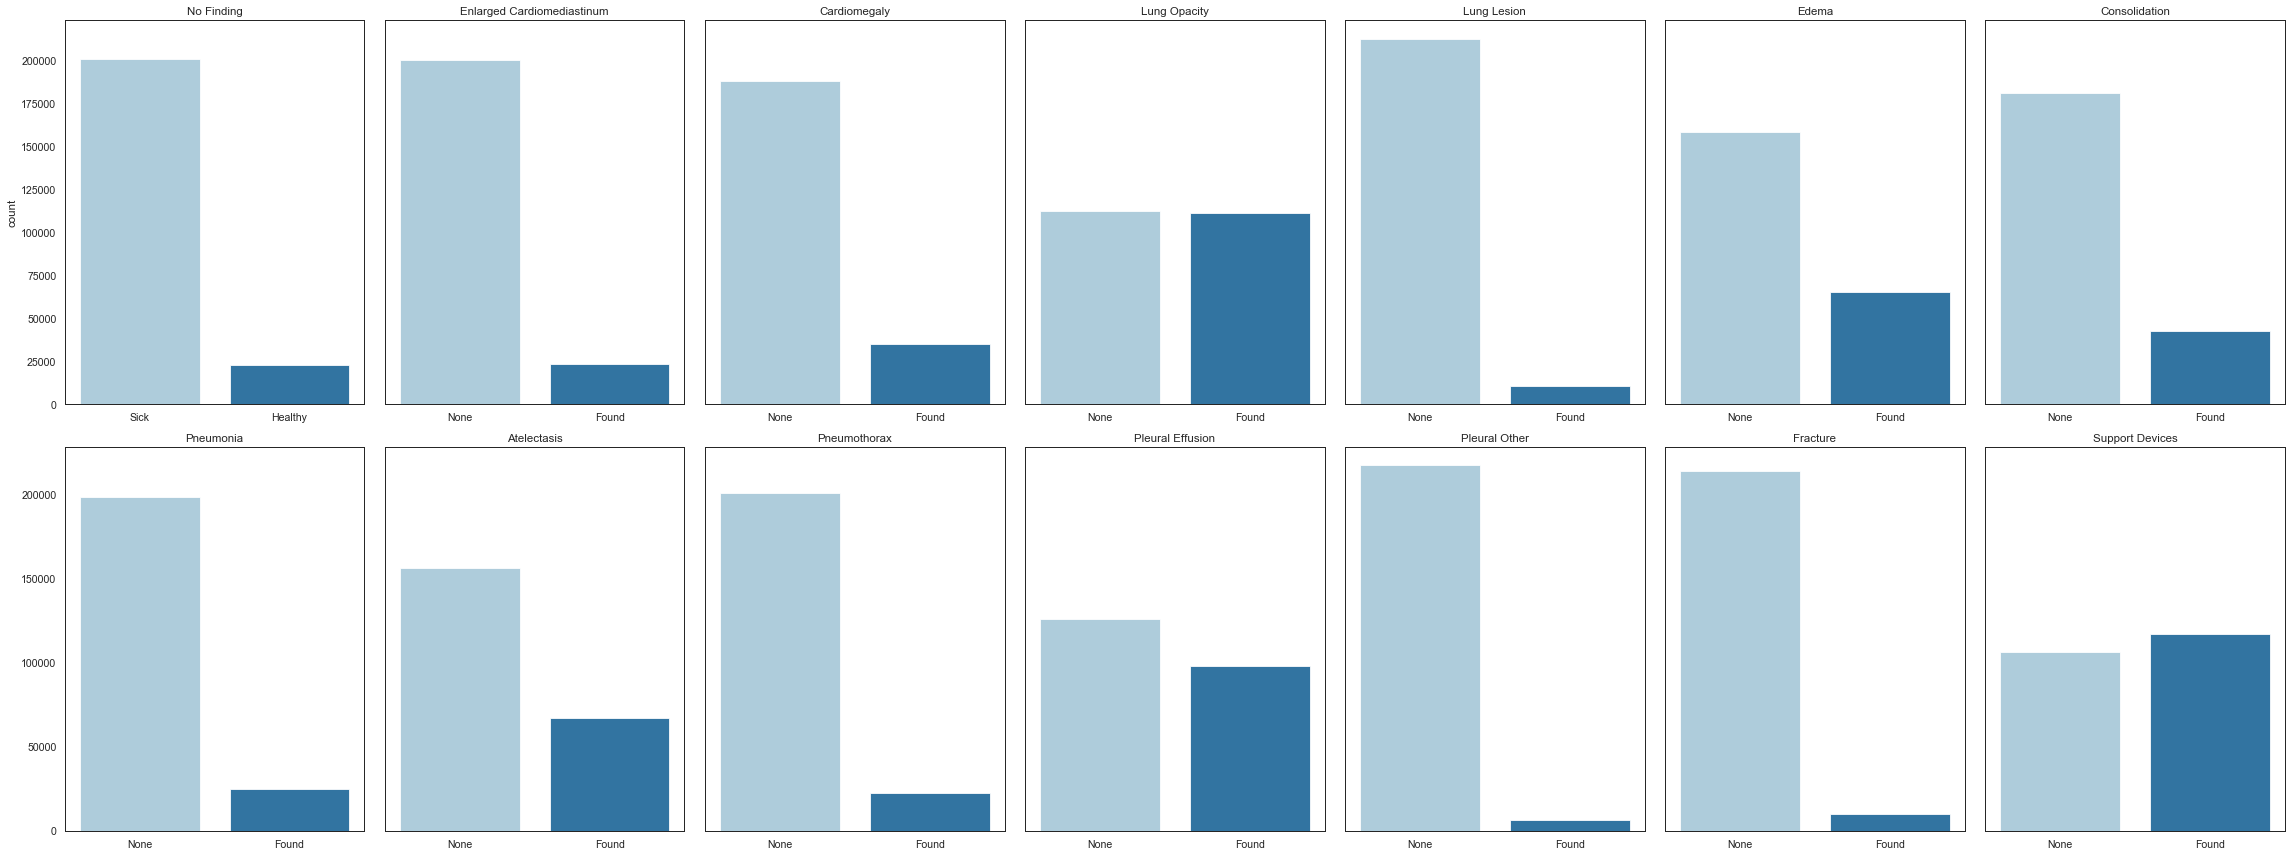

In [21]:
fig, ax = plt.subplots(2, 7, sharey='row', figsize=(32,12))
for i, outcome in enumerate(outcomes):
  #get the axis number
  if i > 6:
    y = i - 7
    x = 1
  else:
    y = i
    x = 0
  
  sns.countplot(
      x = outcome,
      data = filleddf, 
      palette = 'Paired',
      ax = ax[x][y]
  )
  if i > 0:
    ax[x][y].set_ylabel('')

  ax[x][y].set_xlabel('')
  ax[x][y].set_title(outcome)
  ax[x][y].set_xticks([0, 1])
  if i == 0:
    ax[x][y].set_xticklabels(['Sick', 'Healthy'])
  else:
    ax[x][y].set_xticklabels(['None', 'Found'])

plt.tight_layout()
plt.show()

The number of each pathology varies. Some have about a 50/50 distribution of pathologies (ex: lung opacity), while others have hardly any found (Pleural other). No finding, for example, has more 'yes finding' (sick), than 'no finding' ('healthy'), which makes sense since you're less likely to receive a lung x-ray if you are healthy. This might have implications for training, since the model will see fewer of some pathologies than others.

Now we want to count the number of pathologies again

In [26]:
filleddf['Num Pathologies'] = filleddf[ filleddf[ outcomes_only ] > 0  ].sum(axis=1)
filleddf.head(5)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


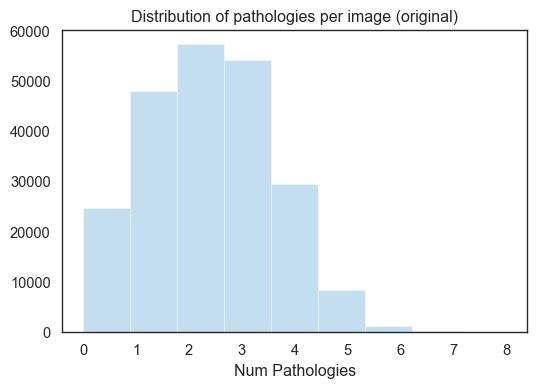

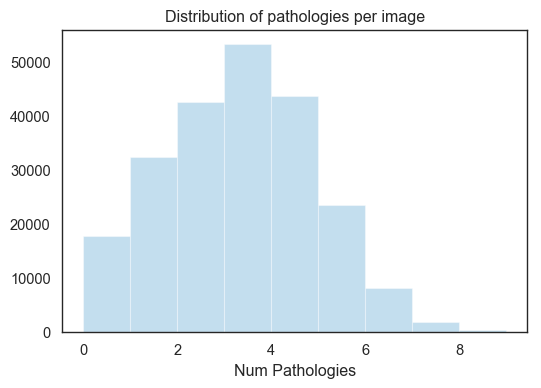

In [60]:
sns.distplot(df['Num Pathologies'], bins=9, kde=False, color=sns.color_palette('Blues', 1))
plt.title('Distribution of pathologies per image (original)')
plt.show()


sns.distplot(filleddf['Num Pathologies'], bins=9, kde=False, color=sns.color_palette('Blues', 1))
plt.title('Distribution of pathologies per image')
plt.show()

With uncertains filled to 'yes's, there are more pathologies per person. The distribution is still centered around 3 to 4.

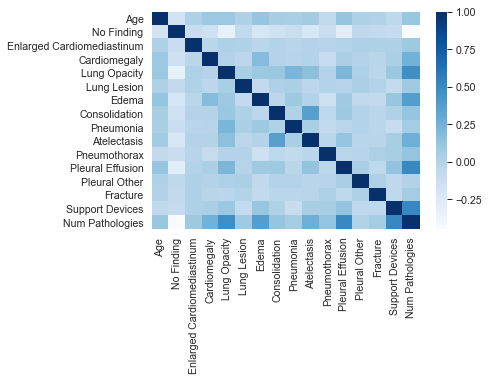

In [25]:
corr = filleddf.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="Blues"
           )

plt.show()

# Explore individual patients

## Extract the patient ID to see redundant patients

In [0]:
filleddf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0,0,1,1,0,1,1,0,1,0,1,0,1,0,7.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0,0,0,1,0,0,1,0,0,0,0,0,1,0,3.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0


We could see above that the same patient (number 00002) had 3 images, two from when she was 83 and one from when she was 87. This inspired us to look into the number of studies per patient and the number of images per study.

In [61]:
def extract_patient_id(url):
    '''
    A method to get the patient ID from the image URL
    '''
    wholename = url.split('/')[2]

    #get rid of the 'patient'
    nonpatient = wholename[7:]

    return nonpatient

#testing
print(extract_patient_id(filleddf.iloc[0]['Path']))

00001


In [63]:
filleddf['Patient ID'] = filleddf['Path'].apply(extract_patient_id)
filleddf.head(5)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies,Patient ID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0,00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,00002
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,00002
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,00003


In [64]:
filleddf.groupby('Patient ID')['Path'].count()

Patient ID
00001     1
00002     3
00003     1
00004     2
00005     4
00006     1
00007     2
00008     2
00009     2
00010     2
00011    14
00012     6
00013     2
00014     2
00015     2
00016     2
00017     2
00018     2
00019     5
00020     1
00021     1
00022     3
00023    20
00024     3
00025     4
00026     2
00027     2
00028     2
00029     1
00030     1
         ..
64511     1
64512     1
64513     1
64514     1
64515     1
64516     1
64517     1
64518     1
64519     1
64520     1
64521     1
64522     1
64523     1
64524     1
64525     1
64526     1
64527     2
64528     1
64529     1
64530     1
64531     1
64532     1
64533     2
64534     1
64535     1
64536     2
64537     2
64538     1
64539     1
64540     1
Name: Path, Length: 64540, dtype: int64

Looks (from that list) like most patients have on image, while others have 2, and some have more like 14 or 20.

### Number of images per patient

In [79]:
filleddf.groupby('Patient ID')['Path'].count()

df_by_patient = pd.DataFrame( filleddf.groupby('Patient ID')['Path'].count(),
                            index = filleddf['Patient ID'])
df_by_patient.columns = ['Num Images']
df_by_patient['Patient ID'] = df_by_patient.index

#drop the duplicates since each patient is listed as many times as they have images
df_by_patient = df_by_patient.drop_duplicates(subset='Patient ID')
df_by_patient.drop(columns = 'Patient ID')

#print the shape, which should be the same as the number of patients.
print(df_by_patient.shape)
display(df_by_patient)

(64540, 2)


,Num Images,Patient ID
Patient ID,,
00001,1,00001
00002,3,00002
00003,1,00003
00004,2,00004
00005,4,00005
00006,1,00006
00007,2,00007
00008,2,00008
00009,2,00009


There are 64,540 patients, which is exactly what we expected.

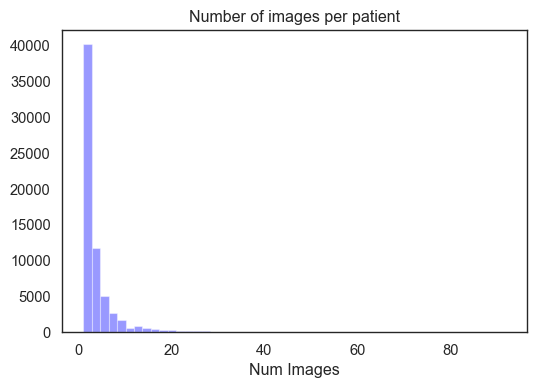

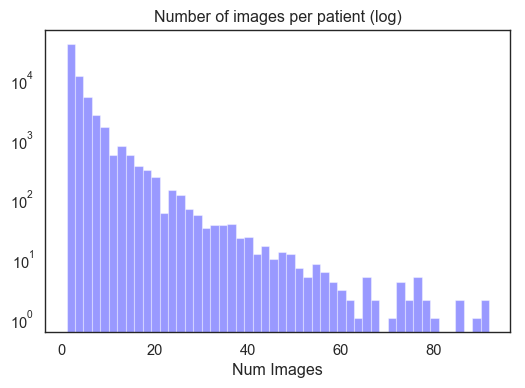

In [83]:
f, ax = plt.subplots(1,1)

sns.distplot(df_by_patient['Num Images'], kde=False, color='blue')
plt.title('Number of images per patient')
plt.show()

f, ax = plt.subplots(1,1)
sns.distplot(df_by_patient['Num Images'], kde=False, color='blue')
ax.set_yscale('log')
plt.title('Number of images per patient (log)')
plt.show()

Some patients have up to 85+ images! The vast majority have less than 20, and most have 1.

### Number of studies per patient

Now we wanna know how many studies are generally done per patient, and how many images are taken per study; and what those kinds of images are.

In [84]:
def extract_studies(url):
    '''
    Gets the study number from the URL to indicate how many studies each patient has been in
    '''
    study = url.split('/')[3]

    #get rid of the 'patient'
    studynum = study[5:]

    return int(studynum)

#testing
print(extract_studies(filleddf.iloc[0]['Path']))

1


In [85]:
filleddf['Study Index'] = filleddf['Path'].apply(extract_studies)
filleddf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies,Patient ID,Study Index
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,00001,1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0,00002,2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,00002,1
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,00002,1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,00003,1


In [86]:
filleddf.groupby('Patient ID')['Study Index'].count()

Patient ID
00001     1
00002     3
00003     1
00004     2
00005     4
00006     1
00007     2
00008     2
00009     2
00010     2
00011    14
00012     6
00013     2
00014     2
00015     2
00016     2
00017     2
00018     2
00019     5
00020     1
00021     1
00022     3
00023    20
00024     3
00025     4
00026     2
00027     2
00028     2
00029     1
00030     1
         ..
64511     1
64512     1
64513     1
64514     1
64515     1
64516     1
64517     1
64518     1
64519     1
64520     1
64521     1
64522     1
64523     1
64524     1
64525     1
64526     1
64527     2
64528     1
64529     1
64530     1
64531     1
64532     1
64533     2
64534     1
64535     1
64536     2
64537     2
64538     1
64539     1
64540     1
Name: Study Index, Length: 64540, dtype: int64

The maximum study number is assumed to be equivalent to the number of studies.

In [87]:
df_by_patient['Num Studies'] = filleddf.groupby('Patient ID')['Study Index'].max()

In [88]:
df_by_patient.head()

,Num Images,Patient ID,Num Studies
Patient ID,,,
00001,1,00001,1
00002,3,00002,2
00003,1,00003,1
00004,2,00004,1
00005,4,00005,2


In [89]:
num_images_per_study = filleddf.groupby(['Patient ID', 'Study Index']).size()

display(num_images_per_study)

Patient ID  Study Index
00001       1              1
00002       1              2
            2              1
00003       1              1
00004       1              2
00005       1              2
            2              2
00006       1              1
00007       1              1
            2              1
00008       1              1
            2              1
00009       1              2
00010       1              2
00011       1              1
            2              1
            3              1
            4              1
            5              1
            6              1
            7              1
            8              1
            9              1
            10             1
            11             1
            12             1
            13             2
00012       1              2
            2              2
            3              2
                          ..
64515       1              1
64516       1              1
64517       1      

### Number of images per study

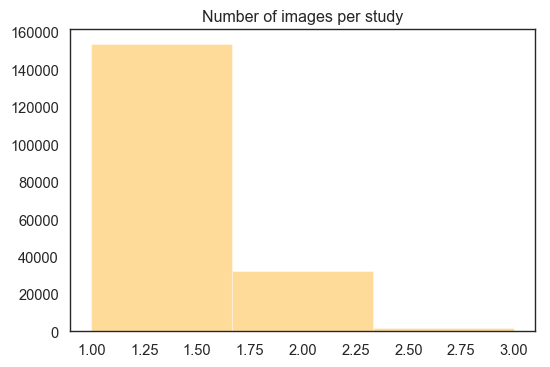

In [90]:

sns.distplot(num_images_per_study.values, kde=False, bins=3, color = 'orange')
plt.title('Number of images per study')
plt.show()

No studies have more than 3 images, and the majority of studies have only 1 image. Now we want to know how many studies each patient does.

In [91]:
filleddf['Study Index'] = filleddf['Path'].apply(extract_studies)

num_studies_total = filleddf.groupby('Patient ID')['Study Index'].max()
display(num_studies_total)

Patient ID
00001     1
00002     2
00003     1
00004     1
00005     2
00006     1
00007     2
00008     2
00009     1
00010     1
00011    13
00012     3
00013     1
00014     1
00015     2
00016     1
00017     2
00018     1
00019     4
00020     1
00021     1
00022     2
00023    11
00024     2
00025     2
00026     1
00027     1
00028     2
00029     1
00030     1
         ..
64511     1
64512     1
64513     1
64514     1
64515     1
64516     1
64517     1
64518     1
64519     1
64520     1
64521     1
64522     1
64523     1
64524     1
64525     1
64526     1
64527     2
64528     1
64529     1
64530     1
64531     1
64532     1
64533     2
64534     1
64535     1
64536     2
64537     2
64538     1
64539     1
64540     1
Name: Study Index, Length: 64540, dtype: int64

In [92]:
num_studies_total.describe()

count    64540.000000
mean         2.907360
std          4.189741
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         91.000000
Name: Study Index, dtype: float64

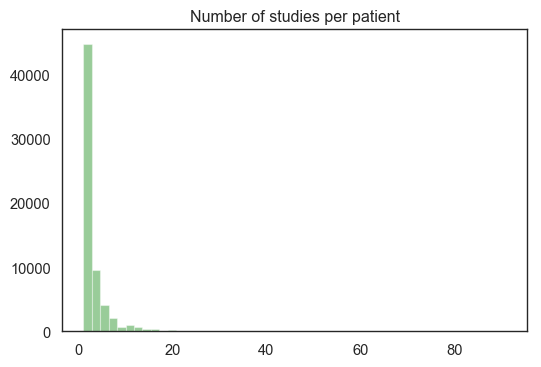

In [93]:
f, ax = plt.subplots(1,1)

sns.distplot(num_studies_total.values, kde=False, color='green')
#ax.set_yscale('log')
plt.title('Number of studies per patient')
plt.show()

This looks pretty similar to the number of images per patients, which makes sense since most studies have only one image.

In [0]:
import numpy as np

np.sort( filleddf['Study Index'].unique())


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91])

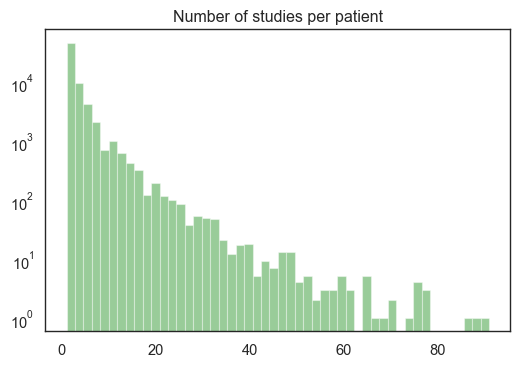

In [94]:
f, ax = plt.subplots(1,1)

sns.distplot(num_studies_total.values, kde=False, color='green')
ax.set_yscale('log')
plt.title('Number of studies per patient')
plt.show()

Number of unique patients

In [96]:
filleddf['Patient ID'].unique().size

64540

There are 64540 unique patients, based on ID numbers (confirmed based on what we expect from the dataset). About half of those patients were in just one study. Many had 2 studies, and a few people participated in more than 80 studies.


## Filter out patients involved in too many studies

We are thinking that people who are involved in lots of studies are sicker, so we may chose to remove patients in the top 5% of number of studies.

In [97]:
smalldf = filleddf.copy()

smalldf.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies,Patient ID,Study Index
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,00001,1
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7.0,00002,2
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,00002,1
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,00002,1
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,00003,1


In [0]:
num_studies_total = smalldf.groupby('Patient ID')['Study Index'].max()

In [0]:
num_studies_total.describe()

count    64540.000000
mean         2.907360
std          4.189741
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         91.000000
Name: Study Index, dtype: float64

In [0]:
np.percentile(num_studies_total, 75)

3.0

In [0]:
np.percentile(num_studies_total, 95)

10.0

Nice, the 95th percentile for the number of studies is 10 studies, which is a nice even number too. 



In [0]:
np.percentile(num_studies_total, 99)

20.0

The top 1% participated in 20 studies.


Now we have to figure out which patients are involved in more than 20 studies and remove those patients.

We could make a list of all the patient IDs of people with a study index of 20 or more.

In [98]:
manystudies = smalldf[ smalldf['Study Index'] >= 20 ]

'manystudies' now contains all of the studies that are greater than 20 - so we scrape for the user ID numbers.

In [99]:
ids_to_remove = manystudies['Patient ID'].unique()
ids_to_remove

array(['00069', '00114', '00128', '00146', '00294', '00310', '00314',
       '00326', '00426', '00463', '00467', '00631', '00693', '00703',
       '00750', '00826', '00877', '00888', '01051', '01071', '01141',
       '01167', '01221', '01457', '01489', '01545', '01595', '01671',
       '01772', '01817', '01844', '01873', '02001', '02009', '02013',
       '02080', '02146', '02153', '02377', '02378', '02382', '02476',
       '02533', '02662', '02847', '02936', '03027', '03107', '03122',
       '03281', '03428', '03452', '03532', '03629', '03685', '03763',
       '03781', '04050', '04064', '04083', '04091', '04102', '04135',
       '04366', '04427', '04462', '04468', '04654', '04722', '04774',
       '04817', '04881', '04929', '04998', '05068', '05109', '05165',
       '05179', '05189', '05232', '05702', '05735', '05745', '05804',
       '06028', '06057', '06081', '06166', '06236', '06309', '06338',
       '06395', '06449', '06458', '06464', '06516', '06578', '06591',
       '06655', '068

Now we have a list of all the patients we want to remove.

In [100]:
smalldf = smalldf[ ~ smalldf['Patient ID'].isin(ids_to_remove) ]

Now check if we removed the people with more than 20 studies

In [101]:
smalldf['Study Index'].describe()

count    199518.000000
mean          3.217730
std           3.111967
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          19.000000
Name: Study Index, dtype: float64

Now the max number of studies was 19, so it worked.

## Image Type

The angle the image was taken in could be lateral, or frontal. Frontal also has some sub types (AP, PA) based on the direction of the image. 

In [102]:
smalldf.head(1)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Num Pathologies,Patient ID,Study Index
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,00001,1


In [103]:
smalldf.groupby('Frontal/Lateral')['Path'].count()

Frontal/Lateral
Frontal    168968
Lateral     30550
Name: Path, dtype: int64

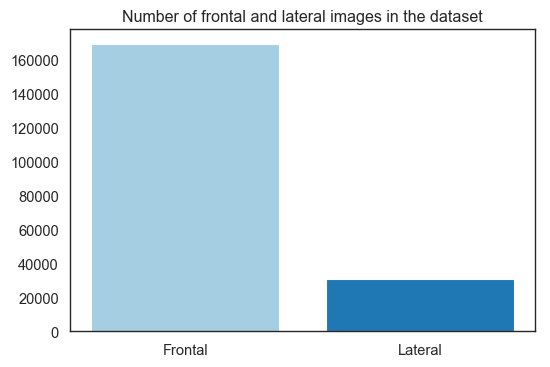

In [106]:
plt.bar(['Frontal', 'Lateral'], 
        height = smalldf.groupby('Frontal/Lateral')['Path'].count(),
        color = sns.color_palette('Paired',2)
       )
plt.title('Number of frontal and lateral images in the dataset')
plt.show()

There's a lot more frontal images than lateral images.

In [0]:
smalldf.groupby('AP/PA')['Path'].count()

AP/PA
AP    141191
LL        15
PA     27761
RL         1
Name: Path, dtype: int64

Looks like there's more AP than PA, but there's also a couple of other image types (LL or RL).

Below, since the 'AP/PA' column is for frontal images, we're going to assume that the nulls are for lateral images. To make it easy, we'll fill those in with 'lateral'

In [107]:
smalldf['Image Type'] = smalldf['AP/PA'].fillna('Lateral')

In [108]:
smalldf['Image Type'].unique()

array(['AP', 'Lateral', 'PA', 'LL', 'RL'], dtype=object)

In [109]:
smalldf.groupby('Image Type')['Path'].count()

Image Type
AP         141191
LL             15
Lateral     30550
PA          27761
RL              1
Name: Path, dtype: int64

For some reason doing 'column.unique' gives a different ordering than groupby. So that's annoying and means we have to manually give the labels

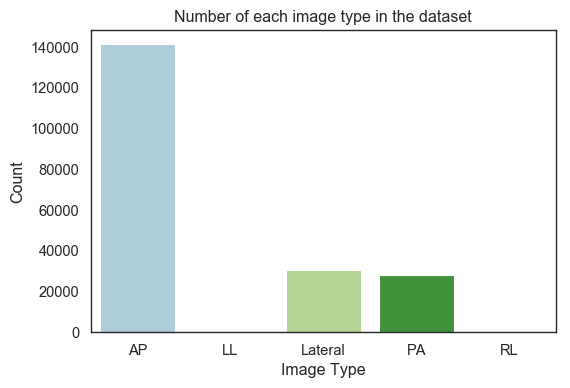

In [111]:
sns.barplot(
    x = ['AP','LL', 'Lateral', 'PA', 'RL'],
    y = smalldf.groupby('Image Type')['Path'].count(),
    palette=sns.color_palette('Paired')
)
plt.title('Number of each image type in the dataset')
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.show()


The most popular image type is AP - anterior-posterior. 
According to Virginia Medical Center (https://www.med-ed.virginia.edu/courses/rad/cxr/technique3chest.html): "Whenever possible the patient should be imaged in an upright PA position.  AP views are less useful and should be reserved for very ill patients who cannot stand erect." Our patients are likely sicker than most.

My assumption is that lateral images are used as a supplement to frontal images. Is this true?

Per each study, how many lateral images are there? how many frontal images?

In [0]:
counting = smalldf.groupby(
    ['Patient ID', 'Study Index', 'Image Type']
)['Path'].count()
counting

Patient ID  Study Index  Image Type
00001       1            AP            1
00002       1            AP            1
                         Lateral       1
            2            AP            1
00003       1            AP            1
00004       1            Lateral       1
                         PA            1
00005       1            Lateral       1
                         PA            1
            2            AP            2
00006       1            AP            1
00007       1            AP            1
            2            AP            1
00008       1            AP            1
            2            AP            1
00009       1            Lateral       1
                         PA            1
00010       1            Lateral       1
                         PA            1
00011       1            AP            1
            2            AP            1
            3            AP            1
            4            AP            1
            5        

In [113]:
#using a pivot table

table = pd.pivot_table(smalldf, 
                    values = 'Image Type',
                    index=['Patient ID', 'Study Index'],
                    #columns=['Image Type'], 
                    aggfunc=np.sum
                   )

table

Image Type
Patient ID Study Index           
00001      1                   AP
00002      1            APLateral
           2                   AP
00003      1                   AP
00004      1            PALateral
00005      1            PALateral
           2                 APAP
00006      1                   AP
00007      1                   AP
           2                   AP
00008      1                   AP
           2                   AP
00009      1            PALateral
00010      1            PALateral
00011      1                   AP
           2                   AP
           3                   AP
           4                   AP
           5                   AP
           6                   AP
           7                   AP
           8                   AP
           9                   AP
           10                  AP
           11                  AP
           12                  AP
           13           PALateral
00012      1            PALateral
           2            PALateral
           3            PALateral
...                           ...
64515      1                   AP
64516      1                   AP
64517      1                   AP
64518      1                   AP
64519      1                   AP
64520      1                   AP
64521      1                   AP
64522      1                   AP
64523      1                   AP
64524      1                   AP
64525      1                   AP
64526      1                   AP
64527      1                   AP
           2                   AP
64528      1                   AP
64529      1                   AP
64530      1                   AP
64531      1                   AP
64532      1                   AP
64533      1                   AP
           2                   AP
64534      1                   AP
64535      1                   AP
64536      1                   AP
           2                   AP
64537      1                   AP
           2                   AP
64538      1                   AP
64539      1                   AP
64540      1                   AP

[165838 rows x 1 columns]

In [114]:
labels = np.sort(table['Image Type'].unique())
labels

array(['AP', 'APAP', 'APAPAP', 'APAPLateral', 'APLLLateral', 'APLateral',
       'APLateralAP', 'APLateralLateral', 'APLateralPA', 'APPA',
       'APPALateral', 'APPAPA', 'APRL', 'LLLateralAP', 'Lateral',
       'LateralAP', 'LateralAPAP', 'LateralLateral', 'LateralLateralAP',
       'LateralPA', 'LateralPAAP', 'PA', 'PAAP', 'PAAPAP', 'PAAPLateral',
       'PAAPPA', 'PALLLateral', 'PALateral', 'PALateralAP', 'PALateralLL',
       'PALateralLateral', 'PALateralPA', 'PAPA', 'PAPALL', 'PAPALateral',
       'PAPAPA'], dtype=object)

There does appear to be a 'lateral only' group

In [115]:
counts = table.groupby('Image Type')['Image Type'].count()
counts

Image Type
AP                  131876
APAP                  2200
APAPAP                  27
APAPLateral             42
APLLLateral              1
APLateral             3246
APLateralAP             40
APLateralLateral       379
APLateralPA              3
APPA                    15
APPALateral             20
APPAPA                   1
APRL                     1
LLLateralAP              2
Lateral                 13
LateralAP              819
LateralAPAP             12
LateralLateral           2
LateralLateralAP        81
LateralPA                2
LateralPAAP              1
PA                    1965
PAAP                    19
PAAPAP                   3
PAAPLateral             26
PAAPPA                   1
PALLLateral              2
PALateral            23895
PALateralAP             25
PALateralLL              9
PALateralLateral       452
PALateralPA            243
PAPA                    89
PAPALL                   1
PAPALateral            321
PAPAPA                   4
Name: Image Type,

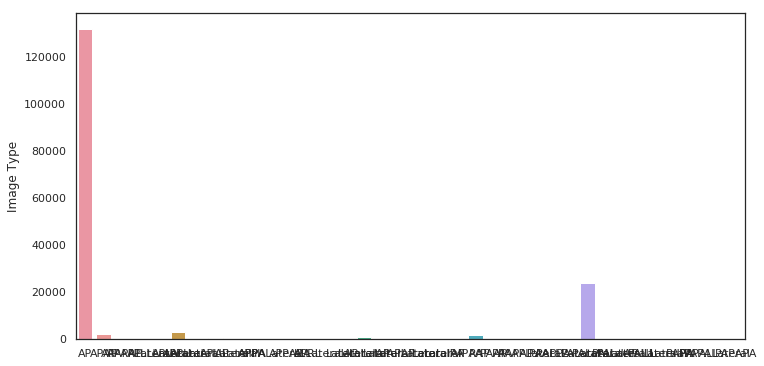

In [0]:
plt.figure( figsize=(12,6))

sns.barplot(
  x = labels,
  y = counts
)
plt.show()

This figure is hard to see so we'll do some more processing on it to see the things we really care more about.

In [117]:
categories = ['Lateral only', 'Frontal Only', 'Both', 'Neither']

def findtype(label):
    #lateral and frontal are booleans
    lateral = not (label.find('Lateral') == -1)
    frontal = not (label.find('PA') == -1 and label.find('AP') == -1)

    if lateral and frontal:
        return "Both"
    elif lateral:
        return "Lateral"
    elif frontal:
        return "Frontal"
    else:
        return "Other"

    
# Test our function
testset = ['APPA', 'Lateral', 'APAP', 'PAAP']
for label in testset: 
    print(label)
    print( 'has lateral', not label.find('Lateral') == -1)
    print( 'has PA', not label.find('PA') == -1 )
    print( 'has AP', not label.find('AP') == -1 )
    print( 'has either AP or PA', not (label.find('PA') == -1 and label.find('AP') == -1) )
    print( findtype(label) )
    print('****')

APPA
has lateral False
has PA True
has AP True
has either AP or PA True
Frontal
****
Lateral
has lateral True
has PA False
has AP False
has either AP or PA False
Lateral
****
APAP
has lateral False
has PA True
has AP True
has either AP or PA True
Frontal
****
PAAP
has lateral False
has PA True
has AP True
has either AP or PA True
Frontal
****


In [119]:
#more testing
for label in labels:
    print(label, 'is', findtype(label))

AP is Frontal
APAP is Frontal
APAPAP is Frontal
APAPLateral is Both
APLLLateral is Both
APLateral is Both
APLateralAP is Both
APLateralLateral is Both
APLateralPA is Both
APPA is Frontal
APPALateral is Both
APPAPA is Frontal
APRL is Frontal
LLLateralAP is Both
Lateral is Lateral
LateralAP is Both
LateralAPAP is Both
LateralLateral is Lateral
LateralLateralAP is Both
LateralPA is Both
LateralPAAP is Both
PA is Frontal
PAAP is Frontal
PAAPAP is Frontal
PAAPLateral is Both
PAAPPA is Frontal
PALLLateral is Both
PALateral is Both
PALateralAP is Both
PALateralLL is Both
PALateralLateral is Both
PALateralPA is Both
PAPA is Frontal
PAPALL is Frontal
PAPALateral is Both
PAPAPA is Frontal


In [120]:
#make a dictionary to hold the counts
category_dict = {
    'Frontal': 0,
    'Lateral': 0,
    'Both': 0
}

for label in counts.index:
    category_dict[ findtype(label) ] += counts[label]

print (category_dict)  

{'Frontal': 136202, 'Lateral': 15, 'Both': 29621}


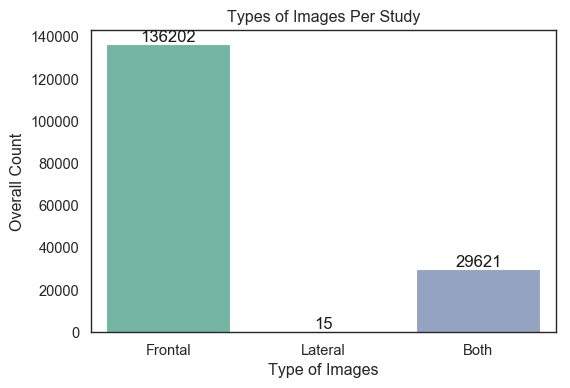

In [121]:
#now plot them
g = sns.barplot(
  x = list(category_dict.keys()),
  y = list(category_dict.values()),
  palette = sns.color_palette('Set2'),
  
)

#Add some labels. code from stackoverflow
for p in g.patches:
    g.text(p.get_x() + p.get_width()/2., 
          p.get_height(), 
          '%d' % int(p.get_height()), 
          fontsize=12, 
          color='k', 
          ha='center', 
          va='bottom'
         )

plt.title('Types of Images Per Study')
plt.xlabel("Type of Images")
plt.ylabel("Overall Count")
plt.show()

Very very few have only lateral images. Mostly, studies only do a frontal image, then some have supplementary lateral images.

# Conclusions

The preprocessing we ultimately chose to do before running our models is:
1. Edit the urls to find the images
2. Change 'nulls' to zeros and 'uncertains' (-1) to 'yes' (1)
3. Remove the few age/sex outliers (age < 18, sex uncertain)
4. Make a column for 'Image Type' (puts together AP/PA and Lateral labels into one column)


We did not end up removing any of the patients with 20+ studies, but if we continued to work on this project, we might see if removing those outliers increased the accuracy of our models.


In order to deal with the class imbalances, we chose to focus on binary classification of classes with similar numbers of patients (e.g. lung opacity), or applying a 'stratified' method, where we took similar numbers of each class to train (limiting the number of total images to train on).